**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab23](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23.ipynb)

___

# <font color=darkred>Laboratory 23: "Confidence Intervals | AB Testing"</font>

**Medrano, Giovanni**

**R11521018**


ENGR 1330 Laboratory 21 - In-Lab

## Some comic relief!

![](https://media4.giphy.com/media/9ADoZQgs0tyww/giphy.gif) <br>

Now on with the show!


### Example 1: Italy & Soccer: How many people love soccer? <br>
*inspired by an example in __"A (very) friendly introduction to Confidence Intervals"__ by __Dima Shulga__ available at* https://towardsdatascience.com/a-very-friendly-introduction-to-confidence-intervals-9add126e714 <br>
*and __"Introduction of Confidence Interval"__ by __Irfan Rahman__ available at* https://medium.com/steps-towards-data-science/confidence-interval-a7fb3484d7b4 <br>
![](https://about.fb.com/wp-content/uploads/2014/07/soccer_analysis.jpg?w=960) <br>
*hint: According to UN estimate data, almost 60 million (60,449,841) people live in Italy <br>
#### For the first example in this lab, we are going to look at a problem from two perspectives, or two "modes" if you may: <br>
#### The GOD mode and The MAN mode. 

![](https://media.borntowin.net/Creazione-di-Adamo-The-Creation-of-Adam-Detail-Hands.jpg)

### The GOD MODE:
#### In GOD mode, we are assuming that we know EVERYTHING about our population (in this case, the population of Italy). Suppose we know (theoretically) the exact percentage of people in Italy that love soccer and it’s 75%. <br>
#### Let's say we want to know the chance of randomly selecting a group of 1000 people that only 73% of them love soccer!

In [3]:
totalpop = 60*10**6  # Total adult population of Italy (60M)
fbl_p = 0.75           #percentage of those loving soccer|football !
fblpop = int(totalpop * fbl_p)         #Population of those who love football
nfblpop = int(totalpop * (1-fbl_p))     #Population of those who doesn't love football


#### Let's create a numpy array with 60 million elements, with a 1 for each one person who loves soccer, and zero otherwise.

In [4]:
import numpy as np
fblpop_1 = np.ones(fblpop)         #An array of "1"s | its length is equal to the population of those who love football | DO NOT ATTEMPT TO PRINT!!!
nfblpop_0 = np.zeros(nfblpop)      #An array of "0"s | its length is equal to the population of those who doesn't love football | DO NOT ATTEMPT TO PRINT!!!
totpop_01 = np.hstack([fblpop_1,nfblpop_0])     #An array of "0 & 1"s | its length is equal to the total population of Italy | DO NOT ATTEMPT TO PRINT!!!

#### As a check, we can get the percentage of "1"s in the array by calculating the mean of it, and indeed it is 75%.

In [5]:
print(np.mean(totpop_01))

0.75


#### Now, lets take few samples and see what percentage do we get:

In [6]:
np.mean(np.random.choice(totpop_01, size=1000)) # Run multiple times

0.741

In [7]:
# Let's do it in a more sophisticated/engineery/data sciency way!
for i in range(10): #Let's take 10 samples
    sample = np.random.choice(totpop_01, size=1000)
    print('Sample', i, ':', np.mean(sample))

Sample 0 : 0.757
Sample 1 : 0.746
Sample 2 : 0.751
Sample 3 : 0.763
Sample 4 : 0.754
Sample 5 : 0.732
Sample 6 : 0.744
Sample 7 : 0.743
Sample 8 : 0.759
Sample 9 : 0.715


#### You can see that we’re getting different values for each sample, but the intuition (and statistics theory) says that the average of large amount of samples should be very close to the real percentage. Let’s do that! lets take many samples and see what happens:

In [8]:
values = []     #Create an empty list
for i in range(100000):     #Let's take 10000 samples 
    sample = np.random.choice(totpop_01, size=1000)     #Notice that the sample size is not changing
    mean = np.mean(sample)
    values.append(mean)     #Store the mean of each sample set
print(np.mean(values))     #Printing the mean of means!
values = np.array(values)
print(values.std())       #Printing the standard deviation of means!

0.75001851
0.013655079178822083


#### We created 10000 samples, checked the percentage of people who love soccer in each sample, and then just averaged them. we got 74.99% which is very close to the real value 75% that we as the GOD knew! <br>

#### Let’s plot a histogram of all the values we got in all the samples. Interestingly, this histogram is  very similar to the normal distribution!<br>


C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

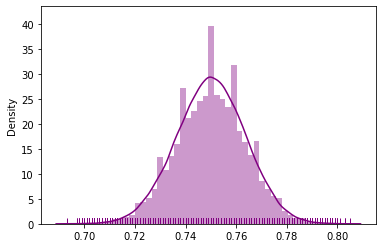

In [9]:
import seaborn as sns

sns.distplot(values,color='purple', rug=True,kde=True)


#### if we do this process a very large number of times (infinite number of times) we will get an histogram that is very close to the normal distribution and we can know the parameters of this distribution.

In [10]:
values = []     #Create an empty list
for i in range(10000):     #Let's take 1000000 samples 
    sample = np.random.choice(totpop_01, size=1000)     #Notice that the sample size is not changing
    mean = np.mean(sample)
    values.append(mean)     #Store the mean of each sample set
print(np.mean(values))     #Printing the mean of means!

0.7500208


C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

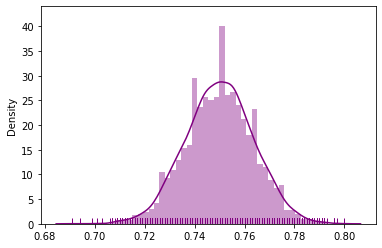

In [11]:
import seaborn as sns

sns.distplot(values,color='purple', rug=True,kde=True)

###### First of all, we can see that the center (the mean) of the histogram is near 75%, exactly as we expected, but we are able to say much more just by looking at the histogram, for example, we can say, that half of the samples are larger than 75%, or, we can say that roughly 25% are larger than 76%. We can also say that almost 95% of the samples are between 72% and 78%. Let's also have a look at the boxplot:

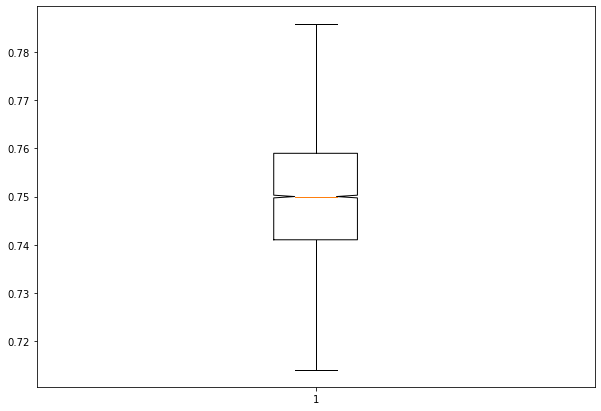

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot (values,1, '')
plt.show()

#### At this point, many people might ask two important questions, “How can I take infinite number of samples?” and “How does it helps me?”. <br>
#### The answer to the first one is that if you are GOD, there is no stopping you! If you are not GOD, you can't! <br>
####  To asnwer the second question, Let’s go back to our example, we initially took one sample of 1000 people and got a value close to 75% but not exactly 75%. We wanted to know, what is the chance that a random sample of 1000 people will have 73% soccer lovers. Using the information above, we can say that there’s a chance of (roughly) 20% that we’ll get a value that is smaller or equal to 73%. <br>
#### We don’t actually need to do the infinite samples. In other words, you don't have to be GOD! You will know why and how in a few moments...

### The MAN MODE:

![](https://i.kym-cdn.com/photos/images/newsfeed/000/770/871/1a9.gif)

#### Back in our horrid and miserable Man mode, we don’t know the actual percentage of soccer lovers in Italy. In fact, we know nothing about the population. 
![](https://ozinparis.com/wp-content/uploads/2016/04/jon-snow-know-nothing-e1461048094110-1.jpg)

#### We do know one thing though: We just took a sample and got 73%. But how does it help us? <br>
#### What we also DO know, is that if we took infinite number of samples, the distibution of their means will look like this: <br>
![](https://miro.medium.com/max/548/1*txu8-J2imhlqIPDqsL3gPA.png) <br>
#### Here μ is the population mean (real percentage of soccer lovers in our example), and σ is the standard deviation of the population. If we know this (and we know the standard deviation) we are able to say that ~68% of the samples will fall in the red area or, more than 95% of the samples will fall outside the green area (in the middle) in this plot: <br>
![](https://miro.medium.com/max/563/1*GX0Qft3_Js0O9gbd9BeCNA.png) <br>

#### This is where the concept of margin of error becomes of great importance:<br>
![](https://www.wallstreetmojo.com/wp-content/uploads/2019/03/Margin-of-Error-Formula.jpg) <br>

![](https://www.statisticsfromatoz.com/uploads/7/3/2/1/73216723/graph-alpha-moe-jpg_1_orig.jpg) <br>


#### Let's mix the GOD mode and the MAN mode. LET's DO MAD MODE!
![](https://static1.squarespace.com/static/59ab26c6ff7c50083fca77c3/5b68af2caa4a99da3bc129cc/5d66957e721ad20001fe1190/1567004323841/Jacob+Wrestles+God.jpg?format=1500w) <br>

#### Of course the distance is symmetric, So if the sample percentage will fall 95% of the time between real percentage-3 and real percentage +3, then the real percentage will be 95% of the times between sample percentage -3 and sample percentage +3.

C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

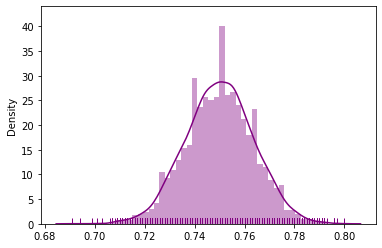

In [13]:
import seaborn as sns

sns.distplot(values,color='purple', rug=True,kde=True)


#### If we took a sample and got 73%, we can say that we are 95% confident that the real percentage is between 70% (73 -3) and 76% (73+3).
#### This is the Confidence Interval, the interval is 73 +- 3 and the confidence is 95%.

![](https://ineedpeakpt.com/wp-content/uploads/2019/05/Mind-Blowing-EMR-and-Meaningful-Use-Stats-and-Facts.gif) <br>


### Example2: From a normally distributed population, we randolmy took a sample of 500 students with a mean score of 461 on the math section of SAT. Suppose the standard deviation of the population is 100, what is the estimated true population mean for the 95% confidence interval.

In [23]:
# Step 1- Organize the data
n = 500                       #Sample size
Xbar = 461                    #Sample mean
C = 0.90                    #Confidence level
std = 100                     #Standard deviation (σ)
z = 1.96                      #The z value associated with 95% Confidence Interval

In [24]:
# Assuming a normally distributed population
# Assuming randomly selected samples
# Step2- Calculate the margin of error
import math
margin = z*(std/math.sqrt(n))
print('The margin of error is equal to : ',margin)

The margin of error is equal to :  8.765386471799175


In [25]:
# Step3- Find the estimated true population mean for the 95% confidence interval
# To find the range of values you just have to add and subtract 8.765 from 461
low = Xbar-margin
high = Xbar+margin
print('the true population mean will be captured within the confidence interval of (',low,' , ',high,') and the confidence is 95%')

the true population mean will be captured within the confidence interval of ( 452.23461352820084  ,  469.76538647179916 ) and the confidence is 95%


### Exercise 1: From a normally distributed population, we randomly took a sample of 200 dogs with a mean weight of 70 pounds. Suppose the standard deviation of the population is 20: <br>
### What is the estimated true population mean for the 95% confidence interva? <br>
### How about 90% confidence interval? <br>
### How about 99% confidence interval? <br>

In [ ]:
The estimated true population mean is between 452 and 469 at a 95% confidence.

In [ ]:
The estimated true population mean is between 450 and 469 at a 90% confidence.

In [ ]:
The estimated true population mean is between 452 and 469 at a 99% confidence.

__*Some great reads on Confidence Intervals:*__
-  __"Confidence Intervals for Machine Learning"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/confidence-intervals-for-machine-learning/ <br>
-  __"Comprehensive Confidence Intervals for Python Developers"__ available at* https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers <br>
-  __"Confidence Interval"__ available at* http://napitupulu-jon.appspot.com/posts/confidence-interval-coursera-statistics.html <br>
-  __"Introduction to Confidence Intervals"__ available at* https://courses.lumenlearning.com/introstats1/chapter/introduction-confidence-intervals/ <br>

__*Some great videos on Confidence Intervals:*__
-  __"Understanding Confidence Intervals: Statistics Help"__ by __Dr Nic's Maths and Stats__ available at* https://www.youtube.com/watch?v=tFWsuO9f74o <br>
-  __"Confidence intervals and margin of error | AP Statistics | Khan Academy"__ by __Khan Academy__ available at* https://www.youtube.com/watch?v=hlM7zdf7zwU <br>
-  __"StatQuest: Confidence Intervals"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=TqOeMYtOc1w <br>

### Example 3: Website Design: A practical example of A/B Testing
*inspired by an example in __"A/B Test Significance in Python"__ by __Samuel Hinton__ available at* https://cosmiccoding.com.au/tutorials/ab_tests <br>
![](https://www.invespcro.com/blog/images/blog-images/ab-test-1-1.jpg) <br>
#### Imagine you’re in charge of a website (e.g., an online videogame shop). You have the current version of the website (aka. "A"), but aren’t happy with it. For instance, you are not selling as much as you like. You want to change the design of the "Add to Cart" button (aka. "B") and maybe that will increase your sells. <br>
![](https://www.volusion.com/blog/content/images/wp/buttonaandbuttonn.jpg) <br>

#### you set up your website so that half the people are directed to the old website, and half to one where you’ve made your change. You have data from both, and want to know, with confidence, “Does the change I made increase the sells?”.<br>

*This is an A/B test. Often this is used interchangably with the term “split testing”, though in general A/B tests test small changes, and split testing might be when you present two entirely different websites to the user.* <br>

#### Why not just change the website and monitor it for a week?
    Good question - by having two sites active at once and randomly directing users to one or the other, you control for all other variables. If one week later puts you the week before Christmas, this will impact sales, and you might draw the wrong conclusion because of these confounding effects.
#### Why is it not an A/B/C test?
    you can have as many perturbations running as you want, but got to keep the name simple. The more perturbations you try though, the smaller a number of samples you’ll have for each case, and the harder it will be to draw statistically significant conclusions.

#### Let us assume you have 1000 users, 550 were directed to site A, 450 to site B. In site A, 48 users made a purchase. In site B, 56 users made a purchase. Is this a statistically significant result?

In [26]:
num_a= 550
num_b = 450
click_a= 48
click_b = 56
rate_a= click_a / num_a
rate_b = click_b / num_b

#### You can click a button, or not. Two discrete options are available, so this is a textbook binomial distribution, with some unknown rate for site A and site B. We don’t know the true click rate, but we can estimate it using our small sample.

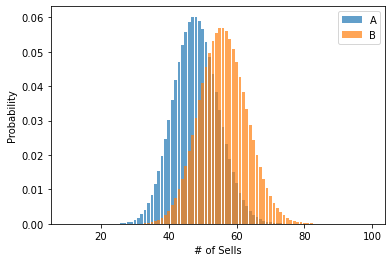

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Determine the probability of having x number of clicks - Binomial Dist.
clicks = np.arange(10, 100)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("# of Sells"); plt.ylabel("Probability");

#### So we can see here that b has an edge, but its certaintly possible if we pick two random points according to the histograms for A and B, that A might actually be higher than B! <Br>
    
#### As we’re interested in the average # of sells, this averaging of an underlying distribution means our final estimate will be well approximated by a normal distribution. So let’s reformulate, using the normal approximation here:

Text(0, 0.5, 'Probability')

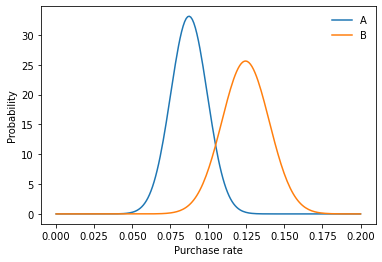

In [28]:
from scipy.stats import norm

# Where does this come from? See this link: https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Purchase rate"); plt.ylabel("Probability")

#### This is also a better plot than the first one, because we’ve removed the confusing effect of site A and site B having a slightly different number of visitors had. So our question is still the same: What is the chance that a draw from B is higher than a draw from A. Is it significant? <br>
#### To answer this, let us utilise the handy fact that the sum (or difference) of normally distributed random numbers is also a normal. This is simple - take the difference in the means and sum the variance. We’ll do two things below: First, get the z-score, and second, plot the proper distribution.



zscore is 1.890, with p-value 0.029


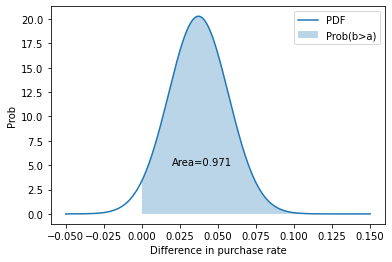

In [29]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in purchase rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

#### we can say that given the null hypothesis ("B is less than or equal to A") is true , we would expect to get this result or a result more extreme only 2.9% of the time. As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that B > A. <br>
#### we’ve made a lot of plots for this to try and explain the concept. You can easily write a tiny function to simplify all of this. Whether you want the confidence or the p-value just means changing the final "norm.cdf" to "norm.sf".

In [30]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.029402650172421833


#### Remember Non-parametric Statistical Hypothesis Tests? We can use them here as well! <br>
#### Imagine we have the raw results of clicks (purchases), as 0s or 1s, as our distribution.

In [31]:
from scipy.stats import mannwhitneyu

a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis B <= A is 0.028


### Exercise 2: Amazon is considering changing the color of their logo. The smile will be green instead of orange! 
![](https://cdn.dribbble.com/users/1923171/screenshots/12213742/amazon.gif) <br>

#### Let us assume out of 5000 users, they have directed 2500 to site A with the previous logo, and the rest to site B with the new logo. In the first group, 1863 users made a purchase. In the second group, 1904 users made a purchase. Is this a statistically significant result? Should Amazon change their logo in order to make more sells?

In [32]:
num_a= 2500
num_b = 2500
click_a= 1863
click_b = 1904
rate_a= click_a / num_a
rate_b = click_b / num_b

In [34]:
print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.0892397034239209


__*Some great reads on A/B Testing:*__
-  __"Implementing A/B Tests in Python"__ by __Robbie Geoghegan__ available at* https://medium.com/@robbiegeoghegan/implementing-a-b-tests-in-python-514e9eb5b3a1 <br>
-  __"The Math Behind A/B Testing with Example Python Code"__ by __Nguyen Ngo__ available at* https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f <br>
-  __"A/B Testing"__ available at* https://www.optimizely.com/optimization-glossary/ab-testing/ <br>
-  __"A/B Testing Guide"__ available at* https://vwo.com/ab-testing/ <br>

__*Some great videos on A/B Testing:*__
-  __"What is A/B Testing? | Data Science in Minutes"__ by __Data Science Dojo__ available at* https://www.youtube.com/watch?v=zFMgpxG-chM <br>
-  __"A/B Testing Intro: Why, What, Where, & How to A/B Test"__ by __Testing Theory__ available at* https://www.youtube.com/watch?v=CH89jd4haRE <br>
-  __"A/B Testing"__ by __Udacity__ available at* https://www.youtube.com/watch?v=8H6QmMQWPEI <br>